# Neural network models

## Nececary imports

In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

## Loading the data

In [4]:
df = load_dataset(split=False, scale=False)
x = df.drop(['category'], axis=1)
y = df['category']

In [5]:
number_of_classes = len(y.unique())
print("classes: ", number_of_classes)

classes:  14


In [6]:
# one hot encoding for categories
y = pd.get_dummies(y)

#### Podela na train_validation i test skup

In [7]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, train_size=0.7, \
                                                                            test_size=0.3, stratify=y)


#### Podela na train i validation skup

In [8]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, \
                            y_train_validation, test_size = 0.3, random_state = 42, stratify = y_train_validation)

In [9]:
print("Train:\t\t", y_train.shape)
print("Validation:\t", y_validation.shape)
print("Test:\t\t", y_test.shape)

Train:		 (10119, 14)
Validation:	 (4338, 14)
Test:		 (6196, 14)


## Creating the networks

In [10]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [11]:
model1 = Sequential()
model1.add(Dense(units = 80, input_dim = number_of_features, activation = 'relu'))
model1.add(Dense(units=30, activation='relu'))
model1.add(Dense(units = output_size, activation='softmax'))
model1.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                2000      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_3 (Dense)              (None, 14)                434       
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2 = Sequential()
model2.add(Dense(units = 100, input_dim = number_of_features, activation = 'relu'))
model2.add(Dense(units=40, activation='relu'))
model2.add(Dense(units=40, activation='relu'))
model2.add(Dense(units = output_size, activation='softmax'))
model2.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               2500      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_7 (Dense)              (None, 14)                574       
Total params: 8,754
Trainable params: 8,754
Non-trainable params: 0
_________________________________________________________________


In [13]:
model3 = Sequential()
model3.add(Dense(units = 150, input_dim = number_of_features, activation = 'relu'))
model3.add(Dense(units=80, activation='relu'))
model3.add(Dense(units=40, activation='relu'))
model3.add(Dense(units=20, activation='sigmoid'))
model3.add(Dense(units = output_size, activation='softmax'))
model3.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                2000      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_3 (Dense)              (None, 14)                434       
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


In [14]:
model4 = Sequential()
model4.add(Dense(units = 120, input_dim = number_of_features, activation = 'relu'))
model4.add(Dense(units=100, activation='relu'))
model4.add(Dense(units=90, activation='relu'))
model4.add(Dense(units=100, activation='relu'))
model4.add(Dense(units=70, activation='relu'))
model4.add(Dense(units=30, activation='sigmoid'))
model4.add(Dense(units = output_size, activation='softmax'))
model4.compile(optimizer='sgd', loss=losses.binary_crossentropy, metrics=['accuracy'])
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 120)               3000      
_________________________________________________________________
dense_14 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_15 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               9100      
_________________________________________________________________
dense_17 (Dense)             (None, 70)                7070      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_19 (Dense)             (None, 14)                434       
Total para

In [15]:
model5 = Sequential()
model5.add(Dense(units = 200, input_dim = number_of_features, activation = 'relu'))
model5.add(Dense(units=100, activation='relu'))
model5.add(Dense(units=100, activation='relu'))
model5.add(Dense(units=70, activation='relu'))
model5.add(Dense(units=34, activation='sigmoid'))
model5.add(Dense(units = output_size, activation='softmax'))
model5.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               5000      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_23 (Dense)             (None, 70)                7070      
_________________________________________________________________
dense_24 (Dense)             (None, 34)                2414      
_________________________________________________________________
dense_25 (Dense)             (None, 14)                490       
Total params: 45,174
Trainable params: 45,174
Non-trainable params: 0
_________________________________________________________________


## Training the networks

In [16]:
history1 = model1.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.3)

In [17]:
history2 = model2.fit(x_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=8)])

In [18]:
history3 = model3.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=10)])

In [19]:
history4 = model4.fit(x_train, y_train, epochs=30, batch_size=64, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=15)])

In [20]:
history5 = model5.fit(x_train, y_train, epochs=30, batch_size=128, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=5)])

## Model characteristics

In [21]:
epochs1 = history1.epoch

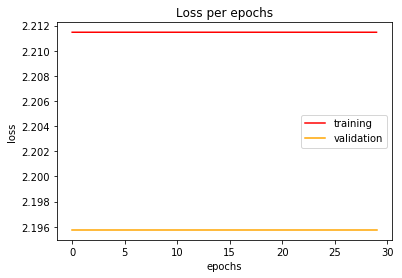

In [22]:
loss = history1.history['loss']
validation_loss = history1.history['val_loss']
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs1, loss, c='red', label='training')
plt.plot(epochs1, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

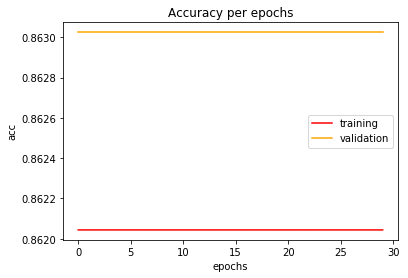

In [23]:
acc = history1.history['acc']
validation_acc = history1.history['val_acc']
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs1, acc, c='red', label='training')
plt.plot(epochs1, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [24]:
epochs2 = history2.epoch

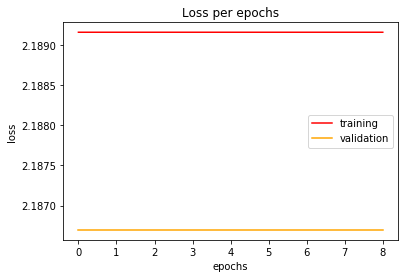

In [25]:
loss = history2.history['loss']
validation_loss = history2.history['val_loss']
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs2, loss, c='red', label='training')
plt.plot(epochs2, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

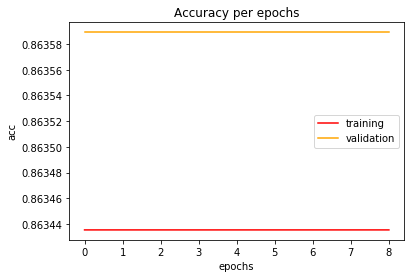

In [26]:
acc = history2.history['acc']
validation_acc = history2.history['val_acc']
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs2, acc, c='red', label='training')
plt.plot(epochs2, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [27]:
epochs3 = history3.epoch

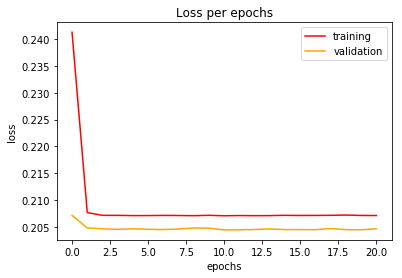

In [28]:
loss = history3.history['loss']
validation_loss = history3.history['val_loss']
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs3, loss, c='red', label='training')
plt.plot(epochs3, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

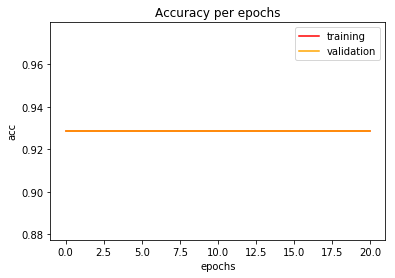

In [29]:
acc = history3.history['acc']
validation_acc = history3.history['val_acc']
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs3, acc, c='red', label='training')
plt.plot(epochs3, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [30]:
epochs4 = history4.epoch

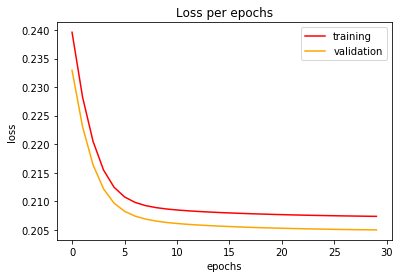

In [31]:
loss = history4.history['loss']
validation_loss = history4.history['val_loss']
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs4, loss, c='red', label='training')
plt.plot(epochs4, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

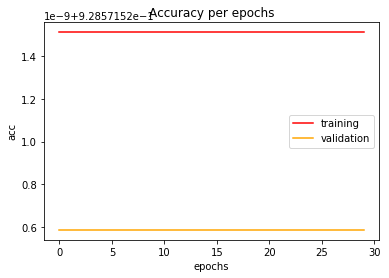

In [32]:
acc = history4.history['acc']
validation_acc = history4.history['val_acc']
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs4, acc, c='red', label='training')
plt.plot(epochs4, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

In [33]:
epochs5 = history5.epoch

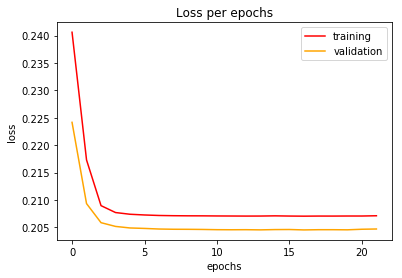

In [34]:
loss = history5.history['loss']
validation_loss = history5.history['val_loss']
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs5, loss, c='red', label='training')
plt.plot(epochs5, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

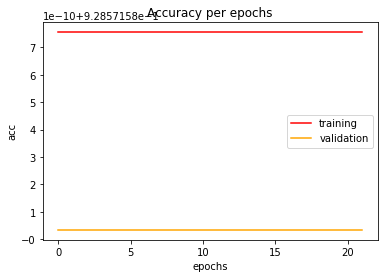

In [35]:
acc = history5.history['acc']
validation_acc = history5.history['val_acc']
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs5, acc, c='red', label='training')
plt.plot(epochs5, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

## Evaluation

In [36]:
accs = []
models = [model1, model2, model3, model4, model5]

In [37]:
# evaluacija mreza na trening skupu
i = 0
for model in models:
    train_loss, train_acc = model.evaluate(x_train, y_train)
    print ("{} Train loss: {}, Train accuracy: {}".format(i, train_loss, train_acc))
    i += 1

10119/10119 [==============================] - 1s 131us/step
0 Train loss: 2.206751904311841, Train accuracy: 0.862338207193085
10119/10119 [==============================] - 1s 136us/step
1 Train loss: 2.1884207596290204, Train accuracy: 0.8634817424246016
10119/10119 [==============================] - 2s 151us/step
2 Train loss: 0.2063268286733126, Train accuracy: 0.9285713434631686
10119/10119 [==============================] - 2s 174us/step
3 Train loss: 0.20663769746241403, Train accuracy: 0.9285713434631686
10119/10119 [==============================] - 2s 166us/step
4 Train loss: 0.20636280714193225, Train accuracy: 0.9285713434631686


In [38]:
# evaluacija mreza na validation skupu
i = 0
for model in models:
    val_loss, val_acc = model.evaluate(x_validation, y_validation)
    print ("{} Validation loss: {}, validation accuracy: {}".format(i, val_loss, val_acc))
    accs.append(val_acc)
    i += 1

4338/4338 [==============================] - 1s 130us/step
0 Validation loss: 2.207153657330187, validation accuracy: 0.8623131445994185
4338/4338 [==============================] - 1s 142us/step
1 Validation loss: 2.188149232257616, validation accuracy: 0.8634986758451959
4338/4338 [==============================] - 1s 149us/step
2 Validation loss: 0.20631468237655512, validation accuracy: 0.9285713436692582
4338/4338 [==============================] - 1s 171us/step
3 Validation loss: 0.2066287562257961, validation accuracy: 0.9285713436692582
4338/4338 [==============================] - 1s 161us/step
4 Validation loss: 0.20635106199867112, validation accuracy: 0.9285713436692582


### Izbor najbolje mreze

In [39]:
best_acc_ind = np.argmax(accs)

In [40]:
print("The best model is model", best_acc_ind + 1)
print("The best model accuracy: ", np.max(accs))

The best model is model 3
The best model accuracy:  0.9285713436692582


In [41]:
best_model = models[best_acc_ind]

In [42]:
best_model_history = best_model.fit(x, y, batch_size=32, verbose=0, \
                    validation_split=0.3, callbacks=[EarlyStopping(patience=4)])

In [43]:
print(x_test[42:43])
print(y_test[42:43])

      danceability  energy  loudness  mode  speechiness  acousticness  \
5319          0.29  0.0615   -18.003     1       0.0391         0.981   

      instrumentalness  liveness  valence    tempo ...  B  C  C#  D  D#  E  F  \
5319             0.831     0.121    0.345  164.594 ...  0  0   0  0   0  0  0   

      F#  G  G#  
5319   0  1   0  

[1 rows x 24 columns]
      chill  classical  country  hiphop  indie_alt  jazz  latin  metal  party  \
5319      1          0        0       0          0     0      0      0      0   

      pop  punk  rnb  rock  workout  
5319    0     0    0     0        0  


In [44]:
y_predicted = best_model.predict(x_test[42:43])

In [45]:
categories = y_test.columns
# model je ispravno pogodio?
categories[np.argmax(y_predicted)]

'chill'

In [46]:
best_model.save("classifier.h5")